In [0]:
from google.colab import drive

In [2]:
drive.mount('/drive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /drive


In [0]:
import os

In [0]:
os.chdir('/drive/My Drive/Deep Learning')

# Neural Network for classification
784, 64, 16, 10

In [5]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
import cv2
%matplotlib inline

In [0]:
from tensorflow.examples.tutorials.mnist import input_data

### Modified National Institute of Science and Technology

In [0]:
mnist = input_data.read_data_sets('./mnist_data', one_hot = True)

In [0]:
# mnist
# 65000 images
# 55000 training dataset

In [0]:
# Training images
x_train = mnist.train.images
y_train = mnist.train.labels
# testing images
x_test = mnist.test.images
y_test = mnist.test.labels

In [10]:
x_train.shape,x_test.shape, y_train.shape,y_test.shape

((55000, 784), (10000, 784), (55000, 10), (10000, 10))

In [0]:
x = mnist.train.images
y = mnist.train.labels

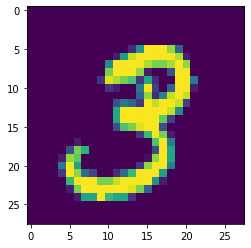

In [13]:
plt.imshow(x[1].reshape(28,28))

In [15]:
y[1].argmax()

3

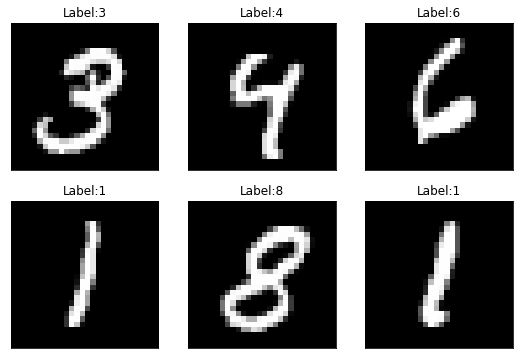

In [16]:
fig = plt.figure(figsize=(9,6))
for i in range(1,7):
    plt.subplot(2,3,i)
    plt.imshow(x[i:i+1].reshape((28,28)),cmap='gray')
    plt.title("Label:{}".format(y[i:i+1].argmax()))
    plt.xticks([]),plt.yticks([])
plt.show()

> # Neural Network

In [0]:
# Feed Forward Network

In [0]:
with tf.name_scope('Input_Layer'):
    X_inputs = tf.placeholder(dtype=tf.float32, shape=[None,784], name='Input')

with tf.name_scope('Weights'):
    wx = tf.Variable(tf.truncated_normal(shape=(784,64)))
    wy = tf.Variable(tf.truncated_normal(shape=(64,16)))
    wz = tf.Variable(tf.truncated_normal(shape=(16,10)))
    #bias
    bx = tf.Variable(tf.truncated_normal(shape=[64]))
    by = tf.Variable(tf.truncated_normal(shape=[16]))
    bz = tf.Variable(tf.truncated_normal(shape=[10]))
    
with tf.name_scope('Layer_1'):
    L1 = tf.matmul(X_inputs,wx, name='L1')
    L1_final = tf.nn.sigmoid(L1+bx, name='Layer1_final')
    
with tf.name_scope('Layer_2'):
    L2 = tf.matmul(L1_final,wy, name='L2')
    L2_final = tf.nn.sigmoid(L2+by, name='Layer2_final')

with tf.name_scope('Layer_3'):
    L3 = tf.matmul(L2_final,wz, name='L3')
    y = tf.nn.sigmoid(L3+bz, name='Output')

> ### Back Propagation

***Softmax function*** takes an N-dimensional vector of real numbers and transforms it into a vector of real number in range (0,1) which add upto 1. 

$p_i=\frac{e^a{i}}{∑^N_{k=1} e_k^a}$


As the name suggests, softmax function is a “soft” version of max function. Instead of selecting one maximum value, it breaks the whole (1) with maximal element getting the largest portion of the distribution, but other smaller elements getting some of it as well.

This property of softmax function that it outputs a probability distribution makes it suitable for probabilistic interpretation in classification tasks.

***Cross Entropy Loss***
Cross entropy indicates the distance between what the model believes the output distribution should be, and what the original distribution really is. It is defined as, 

$H(y,p)=−∑_iy_ilog(p_i)$

In [0]:
with tf.name_scope('loss'):
    y_actual = tf.placeholder(dtype=tf.float32, shape=[None, 10], name = 'actual')
    cost = tf.reduce_mean(tf.nn.softmax_cross_entropy_with_logits_v2(labels=y_actual,
                                                                     logits=y)) # Loss Function

In [0]:
with tf.name_scope('optimizer'):
    optimizer = tf.train.AdamOptimizer(learning_rate=0.01)
    train = optimizer.minimize(cost)

In [0]:
cross_prediction = tf.equal(tf.argmax(y,1), tf.argmax(y_actual,1))
accuracy = tf.reduce_mean(tf.cast(cross_prediction,tf.float32))

# Training Model

In [0]:
epochs = 1001
batch_size = 10000

In [0]:
def batching(last,batch_size):
    return np.random.randint(low=0, high=last, size=batch_size)

In [0]:
saver = tf.train.Saver()

In [28]:
init = tf.global_variables_initializer()
with tf.Session() as sess:
    sess.run(init)
    writer = tf.summary.FileWriter('./neural_class',graph = sess.graph)
    
    for i in range(epochs):
        ind = batching(55000,1000)
        sess.run(train,feed_dict = {X_inputs:x_train[ind],
                                    y_actual:y_train[ind]})
        # Check values for every 100 iterations
        if i%100 == 0:
            ind1 = batching(10000,100)
            loss,acc = sess.run([cost,accuracy],feed_dict = {X_inputs:x_test[ind1],
                                                             y_actual:y_test[ind1]})
            print('Epoch: {}, Loss: {}, Accuracy: {}'.format(i,loss,acc))
            
    saver.save(sess,save_path='./numberclass_nn/nn.ckpt')
    writer.close()

Epoch: 0, Loss: 2.343327045440674, Accuracy: 0.15000000596046448
Epoch: 100, Loss: 1.6461927890777588, Accuracy: 0.8899999856948853
Epoch: 200, Loss: 1.5955647230148315, Accuracy: 0.8899999856948853
Epoch: 300, Loss: 1.5014816522598267, Accuracy: 0.9900000095367432
Epoch: 400, Loss: 1.5383049249649048, Accuracy: 0.9200000166893005
Epoch: 500, Loss: 1.5036293268203735, Accuracy: 0.9599999785423279
Epoch: 600, Loss: 1.501448154449463, Accuracy: 0.9800000190734863
Epoch: 700, Loss: 1.4858006238937378, Accuracy: 0.9700000286102295
Epoch: 800, Loss: 1.5407310724258423, Accuracy: 0.9200000166893005
Epoch: 900, Loss: 1.4969701766967773, Accuracy: 0.9800000190734863
Epoch: 1000, Loss: 1.5215134620666504, Accuracy: 0.9300000071525574


# Testing

In [0]:
import cv2

In [0]:
img = cv2.imread('9.jpg',0)
img

array([[255, 255, 255, ..., 255, 255, 255],
       [255, 255, 255, ..., 255, 255, 255],
       [255, 255, 255, ..., 255, 255, 255],
       ...,
       [255, 255, 255, ..., 255, 255, 255],
       [255, 255, 255, ..., 255, 255, 255],
       [255, 255, 255, ..., 255, 255, 255]], dtype=uint8)

In [0]:
img.shape

(288, 252)

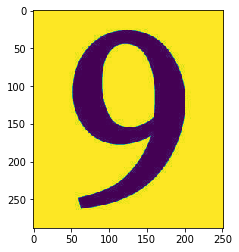

In [0]:
plt.imshow(img)
plt.show()

In [0]:
# Step - 1 : Convert image into gray scale
img = cv2.imread('9.jpg',0)

# Step - 2: inverse colors
img_not = cv2.bitwise_not(img)

In [0]:
img_not

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]], dtype=uint8)

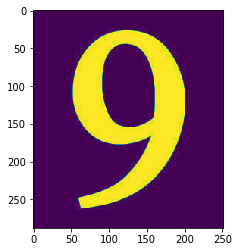

In [0]:
plt.imshow(img_not)

In [0]:
# Step - 3 : resize into 28 * 28
img_resize = cv2.resize(img_not,(28,28))

# Normalize
img_norm = img_resize/img_resize.max()

#step - 4 : reshape into 1 * 784
test = img_norm.reshape((1,784))

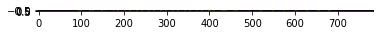

In [0]:
plt.imshow(test)

In [0]:
test.shape

(1, 784)

## Restore the model and testing it

In [0]:
with tf.Session() as sess:
    saver.restore(sess,'./numberclass_nn/nn.ckpt')
    result = sess.run(y,feed_dict={X_inputs:test})
    print(result)

INFO:tensorflow:Restoring parameters from ./numberclass_nn/nn.ckpt
[[1.7850280e-02 2.6822090e-07 2.9116869e-05 2.9910505e-02 3.1685829e-03
  2.9206276e-05 5.6945556e-01 1.8630269e-01 4.9883933e-05 5.2128587e-05]]


In [0]:
result.argmax()

6

In [0]:
result[0][6]

0.56945556